# HW 2: Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file.

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!

### Grading
This homework is due Feb. 21, 2019 by 4:00pm Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

Code Quality - 10%

Storytelling - 10%

Result on Kaggle - 5%

Describing, Cleaning, and Visualizing data - 25%

Modeling - 50%

More specifically, for modeling we will look for:

Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?
Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor

/Users/alexhumble/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#import the csv files
train = pd.read_csv("/Users/alexhumble/Desktop/train.csv",
                   low_memory =False)
test = pd.read_csv("/Users/alexhumble/Desktop/test.csv",
                  low_memory =False)

In [3]:
#inspect the data to see if there are missing values, the columns, etc.
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Skewness

In [4]:
#All columns suffering from skewness greater than 67% will be aggregated in the training set
drop = []

for ii in train:
    if train[ii].value_counts(normalize=True, dropna=False).iloc[0] > .70:
        drop.append(ii)

In [5]:
#Columns above 70% skewness will be dropped
train1 = train.drop(drop, axis = 1)
test1 = test.drop(drop, axis = 1)

In [6]:
train1.shape

(1460, 45)

In [7]:
test1.shape

(1459, 44)

## Fill Missing Values

In [8]:
#These represent subsets of the categorical and quantifiable data within the train dataset
cat = train1.select_dtypes(include = ['object'])
dog = train1.select_dtypes(exclude = ['object'])

#These represent subsets of the categorical and quantifiable data within the test dataset
kitten = test1.select_dtypes(include=['object'])
puppy = test1.select_dtypes(exclude= ['object'])

In [9]:
cat.describe()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
count,1460,1460,1460,1460,1460,1452,1460,1460,1423,1422,1423,1460,1460,770,1379,1379
unique,4,25,8,15,16,4,4,6,4,4,6,5,4,5,6,3
top,Reg,NAmes,1Story,VinylSd,VinylSd,None,TA,PConc,TA,No,Unf,Ex,TA,Gd,Attchd,Unf
freq,925,225,726,515,504,864,906,647,649,953,430,741,735,380,870,605


In [10]:
#As seen above, we are missing data in any column without 1460 observations, here we will aggregate columns with missing values
missing_cat = []
for aa in cat:
    if cat[aa].isnull().any() == True:
        missing_cat.append(aa)
        

In [11]:
#Each of these columns suffers from missing data
missing_cat

['MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [12]:
#Nan values for these categorical columns indicate there isnt that feature in the home. They will be classified as "none"
found_cat = cat.fillna(value = "None")

In [13]:
#All missing values have been filled
found_cat.describe()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,4,25,8,15,16,4,4,6,5,5,7,5,4,6,7,4
top,Reg,NAmes,1Story,VinylSd,VinylSd,None,TA,PConc,TA,No,Unf,Ex,TA,None,Attchd,Unf
freq,925,225,726,515,504,872,906,647,649,953,430,741,735,690,870,605


In [14]:
#The same process with the test dataset - filling columns with missing values
missing_kitten = []
for aa in kitten:
    if kitten[aa].isnull().any() == True:
        missing_kitten.append(aa)

In [15]:
missing_kitten

['Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

Exterior1st, Exterior2nd and KitchenQual are columns with nan values in the test dataset and not the train dataset

In [16]:
#None is not an adequate row value for these columns
kitten.Exterior1st.values

array(['VinylSd', 'Wd Sdng', 'VinylSd', ..., 'VinylSd', 'HdBoard',
       'HdBoard'], dtype=object)

In [17]:
kitten.Exterior2nd.values

array(['VinylSd', 'Wd Sdng', 'VinylSd', ..., 'VinylSd', 'Wd Shng',
       'HdBoard'], dtype=object)

In [18]:
kitten.KitchenQual.values

array(['TA', 'Gd', 'TA', ..., 'TA', 'TA', 'TA'], dtype=object)

In [19]:
#I am going to fill these nan values with the most frequently occurring value for each column
kitten.Exterior1st.describe()

count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object

In [20]:
kitten.Exterior2nd.describe()

count        1458
unique         15
top       VinylSd
freq          510
Name: Exterior2nd, dtype: object

In [21]:
kitten.KitchenQual.describe()

count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object

In [22]:
#After seeing which values occur most frequently in those columns, fill the missing columns with the appropriate value
found_kitten = kitten.fillna(value = {
    "Exterior1st": "VinylSd",
    "Exterior2nd": "VinylSd",
    "MasVnrType": "None",
   "BsmtQual": "None",
 "BsmtExposure": "None",
 "BsmtFinType1": "None",
 "KitchenQual": "TA",
 "FireplaceQu": "None",
 "GarageType": "None",
 "GarageFinish": "None"   
    })

### Quantifiable data

In [23]:
#check for missing values amongst the numerical variables
dog.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [24]:
#all columns with missing values aggregated
found_dog = []
for ll in dog:
    if dog[ll].isnull().any() == True:
        found_dog.append(ll)

    

In [25]:
#Shows important information about the variables with missing values
dog[found_dog].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [26]:
#Same process with the test data - aggregate the columns that have missing values
found_puppy = []
for jj in puppy:
    if puppy[jj].isnull().any() == True:
        found_puppy.append(jj)
found_puppy

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [27]:
#The variables are continuous numerical values, thus I use an imputer to insert values for the missing values
fill = Imputer()
dog_food = fill.fit_transform(dog)
puppy_bites = fill.fit_transform(puppy)

In [28]:
#Using the imputer feature eliminates the column names; here, I am restoring the column names from before
dog_house = []
for rr in dog:
    dog_house.append(rr)
    
puppy_barn = []
for pp in puppy:
    puppy_barn.append(pp)

In [29]:
#The new dataframes now have the imputed values and correct column names
df_GD = pd.DataFrame(dog_food, columns = dog_house)

df_pomski = pd.DataFrame(puppy_bites, columns = puppy_barn)

In [30]:
#describe just to make sure the missing values have been added
df_GD[found_dog].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,70.049958,103.685262,1978.506164
std,22.024023,180.569112,23.994583
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,70.049958,0.000000,1978.506164
75%,79.000000,164.250000,2001.000000
max,313.000000,1600.000000,2010.000000


### Putting the Data Back Together

In [31]:
cats_dogs = pd.concat([df_GD,found_cat], axis =1)
kitties_puppies = pd.concat([df_pomski,found_kitten], axis =1)

In [32]:
cats_dogs.shape, kitties_puppies.shape

((1460, 45), (1459, 44))

In [33]:
# Both the categorical and the numeric data is back in the same dataframe
cats_dogs.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,None,Attchd,RFn
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [34]:
#Same thing here with the test DF - Both the categorical and the numeric data is back in the same dataframe
kitties_puppies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,TA,CBlock,TA,No,Rec,TA,TA,None,Attchd,Unf
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,TA,CBlock,TA,No,ALQ,TA,Gd,None,Attchd,Unf
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,TA,PConc,Gd,No,GLQ,Gd,TA,TA,Attchd,Fin
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,TA,PConc,TA,No,GLQ,Ex,Gd,Gd,Attchd,Fin
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,Gd,PConc,Gd,No,ALQ,Ex,Gd,None,Attchd,RFn


In [35]:
corr = cats_dogs.corr()

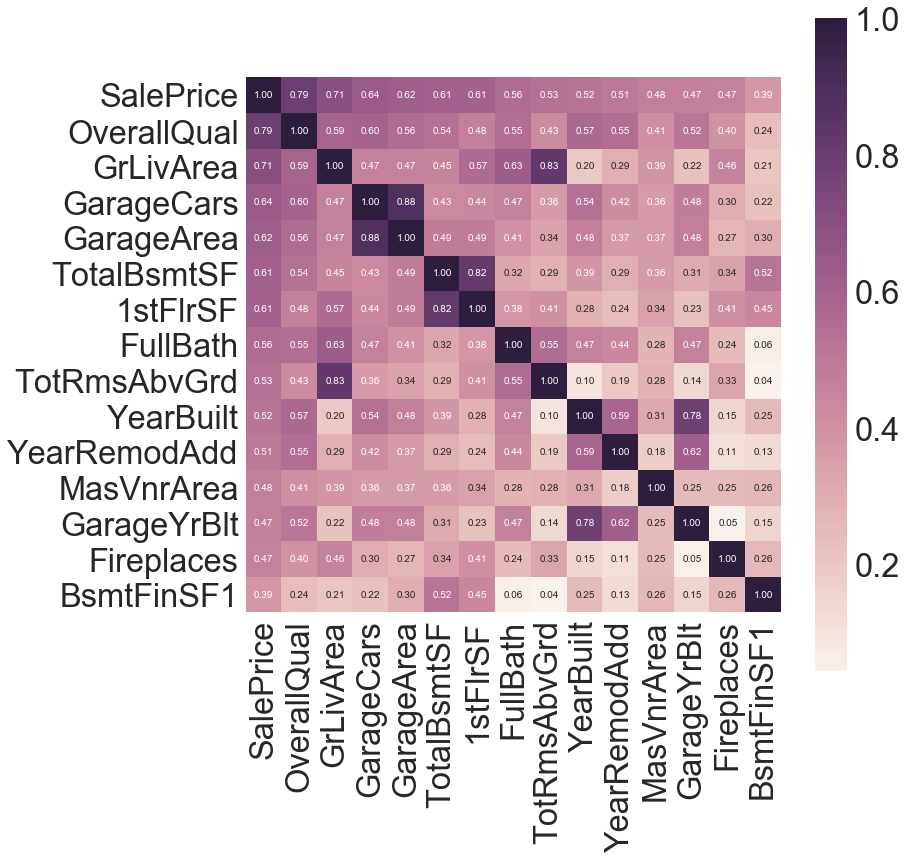

In [36]:
#Used to make a heatmap to see which variables are most correlated with sale price of homes
#also shows how strongly variables are with each other
k =15
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(cats_dogs[cols].values.T)
sns.set(font_scale=3.25)
f, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Users/alexhumble/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/alexhumble/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


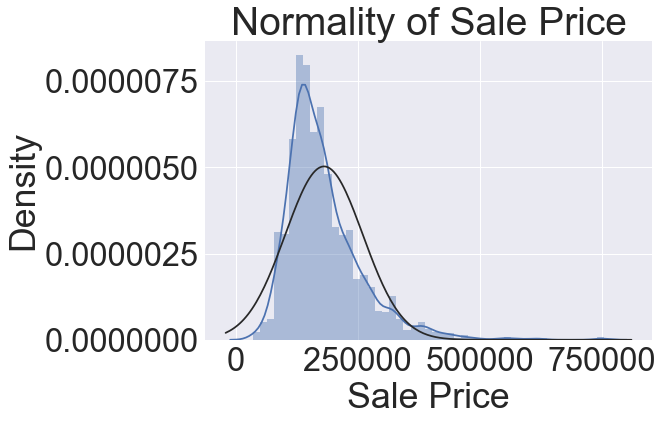

In [37]:
#Shows normality of Sale Price
sns.distplot(cats_dogs['SalePrice'], fit=norm)
plt.title("Normality of Sale Price")
plt.ylabel("Density")
plt.xlabel("Sale Price")
plt.show()

In [38]:
#Now we will take the log of the sale price and see how the distribution compares
cats_dogs.is_copy = False
cats_dogs['log_SalePrice'] = np.log(cats_dogs['SalePrice'])
import warnings 
warnings.filterwarnings("ignore")


/Users/alexhumble/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/alexhumble/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


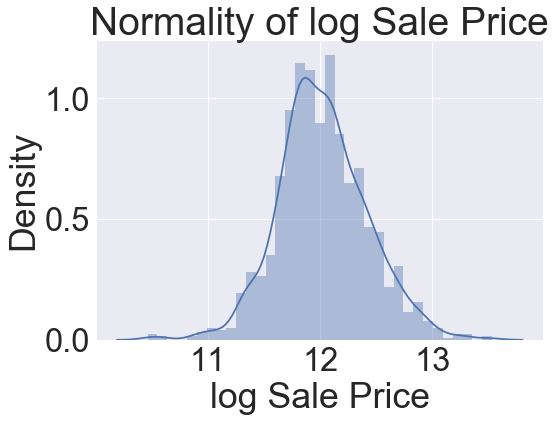

In [39]:
sns.distplot(cats_dogs['log_SalePrice'])
plt.title("Normality of log Sale Price")
plt.ylabel("Density")
plt.xlabel("log Sale Price")
plt.show()

The log of sale price is normally distributed and will be far easier to work with later on as we build the models.
This will be especially helpful for the linear regression model.

## Outliers 

Sensitivity to outliers causes us to access the data and see if there is a need to remove certain outliers that may
negatively impact our models later on.

In [40]:
out = cats_dogs.select_dtypes(exclude= ['object'])

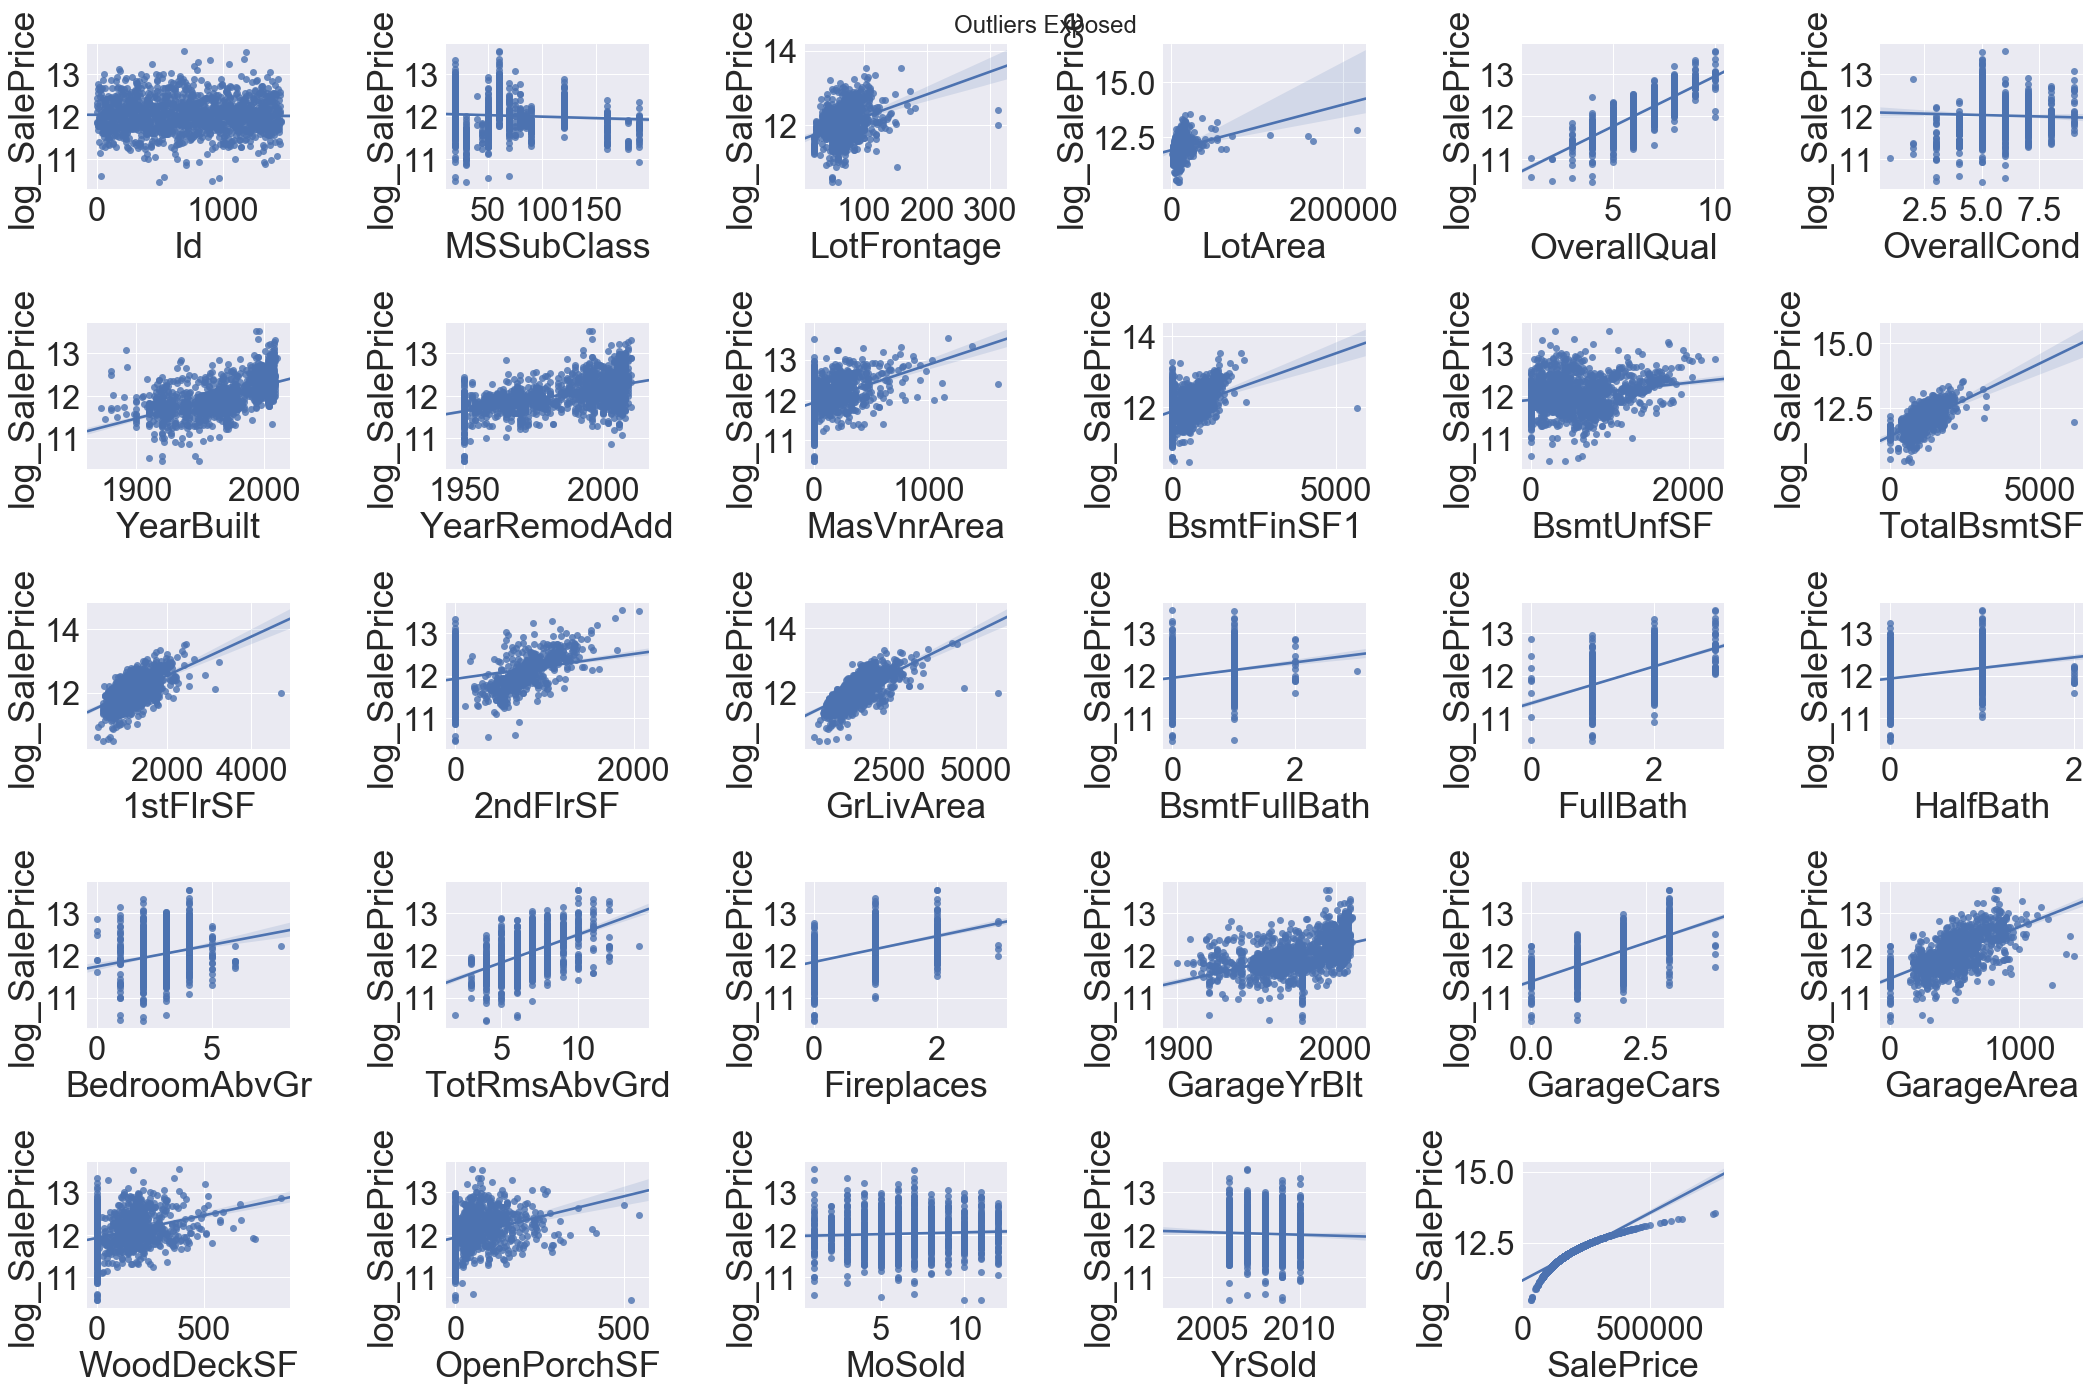

In [41]:
out1 = plt.figure(figsize=(30,20))
#This will create a regplot shoowing the log Sales Price and each variable
for i in np.arange(29):
    aa = out1.add_subplot(5,6,i+1)
    sns.regplot(x=out.iloc[:,i], y=cats_dogs['log_SalePrice'])
plt.tight_layout()    
plt.suptitle("Outliers Exposed", fontsize = 24)
plt.show()
    

In [42]:
cats_dogs.shape

(1460, 46)

In [43]:
#After visually seeing the outliers within the dataset, I have decided to remove the most serious offenders in order to
#clean the data and ensure that our models are not skewed by the outliers later on
cats_dogs1 = cats_dogs.drop(cats_dogs[(cats_dogs['1stFlrSF']>4000)].index)
cats_dogs1 = cats_dogs.drop(cats_dogs[(cats_dogs['LotFrontage']>300)].index)
cats_dogs1 = cats_dogs.drop(cats_dogs[(cats_dogs['BsmtFinSF1']>5000)].index)
cats_dogs1 = cats_dogs.drop(cats_dogs[(cats_dogs['OpenPorchSF']>500)
                                  & (cats_dogs['log_SalePrice']<11)].index)
cats_dogs1 = cats_dogs.drop(cats_dogs[(cats_dogs['TotalBsmtSF']>500)].index)
cats_dogs1 = cats_dogs.drop(cats_dogs[(cats_dogs['GrLivArea']>4000)
                                  & (cats_dogs['log_SalePrice']<12.5)].index)


This removes all the outliers and preps the data for modeling

In [44]:
cats_dogs1.shape, kitties_puppies.shape

((1458, 46), (1459, 44))

In [45]:
outlier = cats_dogs.select_dtypes(exclude= ['object'])

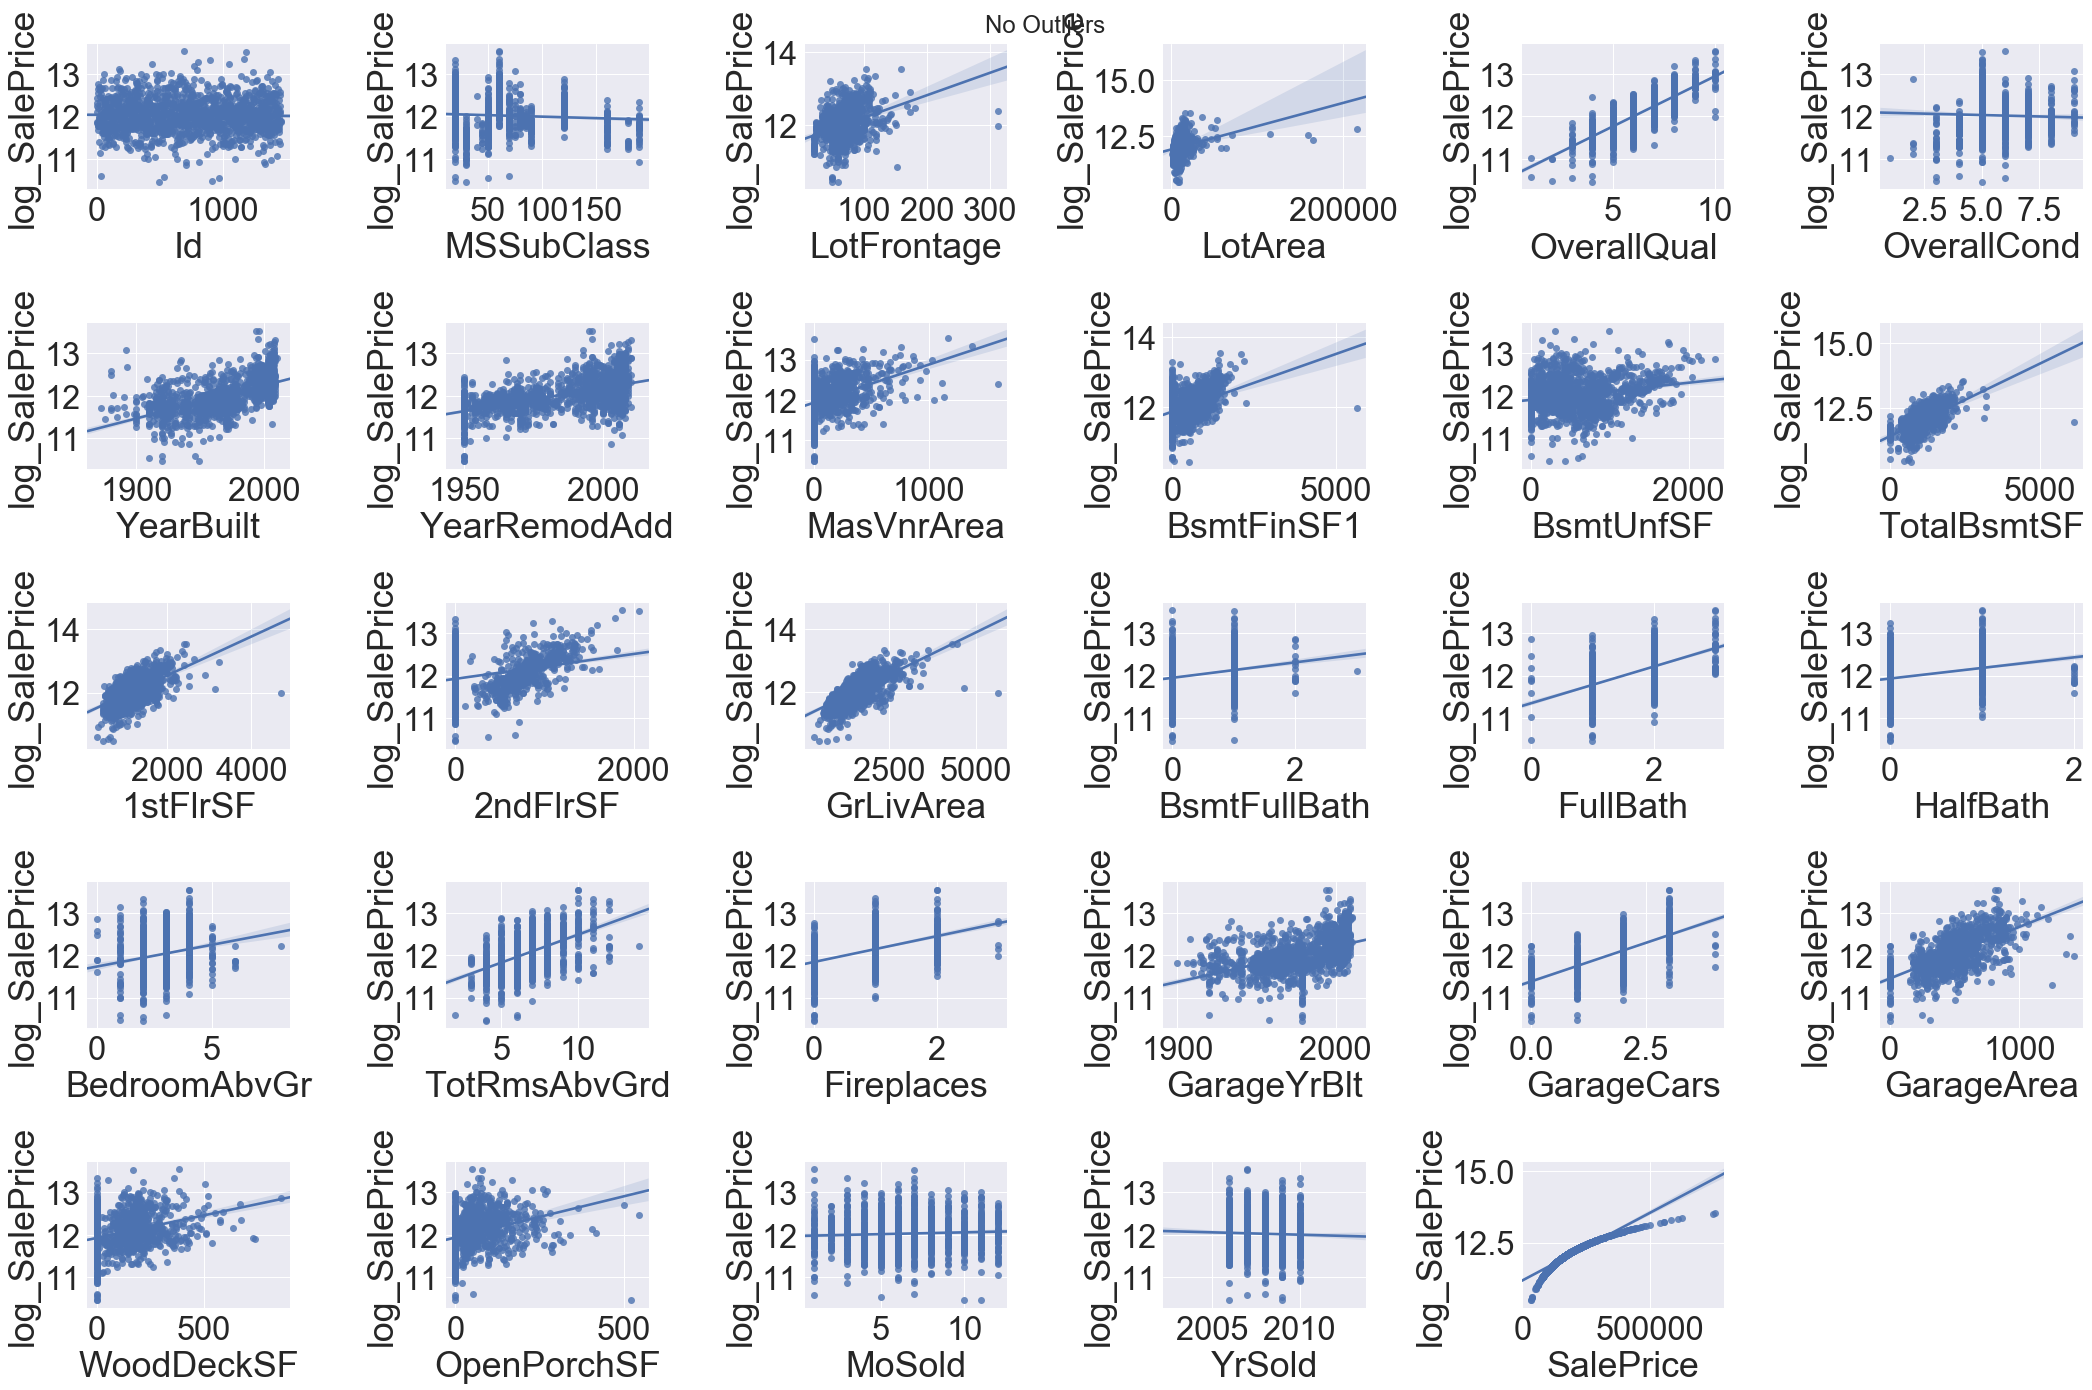

In [46]:
#Now we are able to see the same figures as above except this time the outliers are removed. Double check to make sure there
#are no remaining outliers
out = plt.figure(figsize=(30,20))
for i in np.arange(29):
    aa = out.add_subplot(5,6,i+1)
    sns.regplot(x=outlier.iloc[:,i], y=cats_dogs['log_SalePrice'])
plt.tight_layout()    
plt.suptitle("No Outliers", fontsize = 24)
plt.show()

In [47]:
cats_dogs.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'LotShape',
       'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'log_SalePrice'],
      dtype='object')

In [48]:
#label the train and test data sets in order to separate them after the dummies are added
cats_dogs1['label'] = 'train'
kitties_puppies['label'] = 'test'

In [49]:
#Need to concat the train and test together to ensure they have the same amount of column values when we generate dummies
concat_df = pd.concat([cats_dogs1, kitties_puppies])

#Create dummies for both data sets
dummy = pd.get_dummies(concat_df)#, columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
#        'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'LotShape',
#        'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
#        'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
#        'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
#        'GarageFinish'], dummy_na=True)

In [50]:
dummy.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath',
       'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       ...
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'label_test',
       'label_train'],
      dtype='object', length=157)

In [51]:
#Split the data by using the labels
cats_dogs1 = dummy[dummy['label_train'] == 1]
kitties_puppies = dummy[dummy['label_test'] == 1]


In [52]:
#drop the labels
cats_dogs2 = cats_dogs1.drop('label_train', axis=1)
kitties_puppies2 = kitties_puppies.drop('label_test', axis=1)


In [53]:
#After concat, we need to drop these two columns from the test data
kitties_puppies2 = kitties_puppies2.drop(['SalePrice', 'log_SalePrice'], axis=1)

In [54]:
cats_dogs2 = cats_dogs2.drop(['label_test', 'SalePrice'], axis=1)

In [55]:
#Each row value for categorical columns has become its own column with dummy variables inserted in
#Double check to make sure these categorical values are now numerical dummies
cats_dogs2.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,856.0,854.0,3.0,706.0,1.0,150.0,0.0,2.0,548.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1262.0,0.0,3.0,978.0,0.0,284.0,1.0,2.0,460.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,920.0,866.0,3.0,486.0,1.0,434.0,1.0,2.0,608.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,961.0,756.0,3.0,216.0,1.0,540.0,1.0,1.0,642.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,1145.0,1053.0,4.0,655.0,1.0,490.0,1.0,2.0,836.0,3.0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
cats_dogs2.shape

(1458, 154)

In [57]:
kitties_puppies2.shape

(1459, 154)

In [58]:
target = cats_dogs2['log_SalePrice']
predictors = cats_dogs2.drop(['log_SalePrice'],axis=1)
# predictors = cats_dogs2[['Id','LotArea', 'YearBuilt','OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFullBath',
# 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces','GarageCars', 'LotFrontage', 'GrLivArea', 
# 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'Neighborhood_BrDale','Neighborhood_BrkSide',
# 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR',
# 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_SWISU',
# 'Neighborhood_Sawyer','Neighborhood_SawyerW','HouseStyle_1Story','HouseStyle_2Story', 
# 'Exterior1st_BrkFace','Exterior1st_CemntBd','Exterior1st_HdBoard', 
# 'Exterior2nd_CmentBd','Exterior2nd_HdBoard', 'ExterQual_Gd','ExterQual_TA','Foundation_BrkTil',
# 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtExposure_Mn',
# 'BsmtExposure_No', 'BsmtFinType1_BLQ' , 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ' ,  'HeatingQC_Fa', 'HeatingQC_Gd',
# 'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_None', 'GarageType_BuiltIn',
# 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None','GarageFinish_Fin', 'GarageFinish_None' ]]


Now we have separated the train data into two separate groups - target and predictors - in order to begin modeling.

## Modeling

In [59]:
#In order for cross validation to work, we need to separate the train data
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [60]:
sclr = StandardScaler()
#Use fit operation to fit the x_train data
sclr.fit(x_train)
scale = sclr.transform(x_train)
scale_test = sclr.transform(x_test)

Using the scaler feature enables me to normalize the data by subtracting the mean and diving by the standard deviation. With a normal distribution, the data now fits key assumptions for the following modeling technique - Standard Gradient Descent

I will model using the following models:
- Standard Gradient Descent
- K-Nearest Neighbors
- Random Forest
- Elastic Net
- SVM

## Standard Gradient Descent

The standard gradient descent model works by guessing Beta values and then converging towards the true minimum by subtracting the negative of the gradient. We give the model several learning rates to choose from and it will identify the best learning rate amongst the options. This will help us to ensure that we are actually converging towards a true minimum.

In [61]:
lin_reg_model = SGDRegressor()
#This is the learning rate at the outset
parametersearch = {"eta0": [.0005, .001, .003, .01, .03, .05, .07, .1, .15, .2, .3, 1]}
#used to find the best parameters for our model
gridsearch = GridSearchCV(lin_reg_model,param_grid=parametersearch, cv=3, scoring='neg_mean_squared_error')
gridsearch.fit(scale,y_train)
print("Ideal Parameters: {}".format(gridsearch.best_params_))

Ideal Parameters: {'eta0': 0.003}


In [62]:
#predicts values on train and test for the fitted model
tr_pre = gridsearch.predict(scale)
te_pre = gridsearch.predict(scale_test)

In [63]:
tr_pre

array([11.09628734, 10.59680638, 10.86558688, ..., 10.73825548,
       10.68343808, 11.59040314])

In [64]:
#Since the competition uses RMSE as the tool of measurement, I do the same here
train_RMSE = np.sqrt(mean_squared_error(y_train, tr_pre))
test_RMSE = np.sqrt(mean_squared_error(y_test, te_pre))

In [65]:
#Shows our RMSE 
print("Train RMSE: {}".format(train_RMSE))
print("Test RMSE: {}".format(test_RMSE))

Train RMSE: 1.0114574658962714
Test RMSE: 1.0147043370141404


In [66]:
lin_reg_model1 = SGDRegressor( eta0=.01)
lin_reg_model1.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [67]:
train_predictions = gridsearch.predict(scale)
test_predictions = gridsearch.predict(scale_test)
print(train_predictions)
print(test_predictions)


[11.09628734 10.59680638 10.86558688 ... 10.73825548 10.68343808
 11.59040314]
[11.44761448 10.63122743 10.48694235 11.08536242 11.63929089 11.09297256
 11.47252069 11.77833413 11.53011871 10.90859505 10.85888594 11.10525835
 11.06257755 11.91447803 11.03331578 11.30274833 11.15686527 10.80595613
 10.56179397 11.2802291  11.13297516 11.24026337 10.99523056 11.48051936
 11.11031747 10.95956615 11.00386398 10.53217677 11.03980209 10.94801161
 10.89738428 10.57832355 11.1198006  10.64931591 11.49466001 12.30159999
 10.64778109 11.17621804 10.74819831 10.60616037 10.74103856 11.31796904
 10.4647896  10.81213272 10.68179768 11.0428882  10.66900518 10.71178487
 10.76268942 11.01132855 11.23531597 10.41430969 10.63907569 10.76717822
 11.05653953 11.35962564 11.23098459 11.07939358 10.95310238  9.86447743
 10.31907831 11.06120629 11.60836199 11.50794068 11.43245355 11.17093804
 10.46777525 10.39068292 10.72273253 11.01875859 11.69538256 10.97243265
 10.51946127 10.86024767 11.1110994  11.20852

In [68]:
np.exp(gridsearch.predict(scale_test)[0:5])

array([ 93677.609193  ,  41407.91930036,  35844.3899472 ,  65209.62872136,
       113469.67363832])

## K-Nearest Neighbors

K Nearest Numbers provides a different modeling approach than Gradient Descent because it clusters the data together and then votes on the most effective number of clusters or 'neighbors' for the model. Here I am importing the necesary kits from sklearn and letting the model decide on what observation to cluster on. 

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
kreg = KNeighborsRegressor()
search = GridSearchCV(kreg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring = 'neg_mean_squared_error')
search.fit(x_train, y_train)
print("Best Params: {}".format(search.best_params_))
y_pred_train = search.predict(x_train)
y_pred_test = search.predict(x_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                                     mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Train MSE: 0.0	Test MSE: 0.04033699907247988


In [71]:
train_predictions1 = search.predict(x_train)
test_predictions1 = search.predict(x_test)
print(train_predictions1)
print(test_predictions1)

[12.06681058 11.88448902 11.88448902 ... 11.8386256  11.78676213
 12.46458334]
[12.34128166 11.49112656 11.61828371 11.90268413 12.46899625 11.7776852
 12.24350129 12.4915666  12.32792976 11.91912483 11.82072996 12.1443808
 11.98405374 12.47727467 12.084159   11.88357525 12.06404273 11.64871299
 11.6471675  12.21876654 12.27908766 12.0712372  12.11993417 12.26210966
 12.21825825 12.01067267 12.12698322 11.73923172 12.15238224 11.80268721
 11.60701231 11.61071978 12.11229584 11.61359939 12.24627994 12.50439345
 11.58993057 12.07693363 12.0084984  11.58887635 11.58541186 12.28619494
 11.74986758 11.86801324 11.84214565 12.00700241 11.84689773 11.79349624
 11.78976654 11.58039828 12.02216551 11.76363476 11.88451305 12.16370368
 11.87446825 12.62174209 12.21547402 11.95625865 11.91507831 11.09442525
 11.35402228 12.07345296 12.47775655 12.39146526 12.51225955 12.10220096
 11.74007777 11.40785362 11.6903039  11.936778   12.46781586 11.84172857
 11.60231518 11.98370394 12.15233122 12.0934634

## Elastic Net

By penalizing coefficients that are too large, elastic net enables us to get a more precise prediction that the gradient descent model above. L1 and L2 regularization techniques make the larger coefficients more punishable. 

In [72]:
from sklearn.linear_model import ElasticNetCV

In [73]:
#This will search for the best parameters
enet = ElasticNetCV(l1_ratio=[.0001,.0005,.0008,.001,.003,.005,.01,.035,.1,.7,.9,.99]
                    ,alphas = [.0001,.0005,.0008,.001,.003,.005,.008,.01,.035,.066,.1,1,10], max_iter = 10000)
enet.fit(x_train, y_train)
print("Best Alpha: {}".format(enet.alpha_))
print("Best L1/L2 Ratio: {}".format(enet.l1_ratio_))
train_predictions = enet.predict(x_train)
test_predictions = enet.predict(x_test)

print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Best Alpha: 0.001
Best L1/L2 Ratio: 0.7
Train MSE: 0.012122889169163221
Test MSE: 0.01502757958784335


Text(0, 0.5, 'Abs Value of Coefficient')

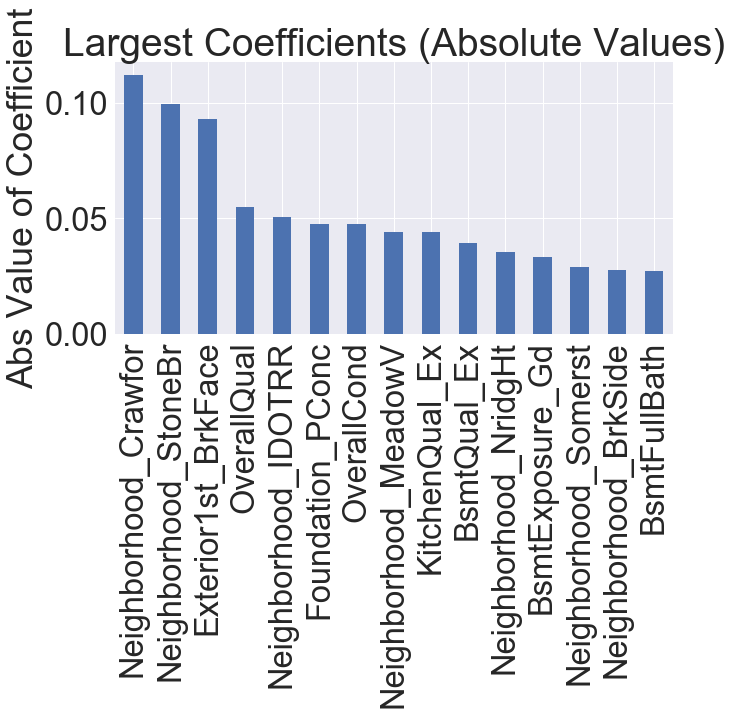

In [74]:
#plotting the coefficients will show which ones have the greatest effect on sale price of the homes
#we use the absolute value here because we are interested in seeing which ones have the greatest effect, not necessarily postive or negative
coefficients = np.abs(enet.coef_)
series_coef = pd.Series(np.abs(enet.coef_),index = x_train.columns)
largest_coef = series_coef.nlargest(n=15)
largest_coef.plot(kind='bar',title = "Largest Coefficients (Absolute Values)",figsize=(10,5))
plt.ylabel('Abs Value of Coefficient')

## Random Forest

Random forest follows a different structure than the models used above, so it should provide a nice comparison with the ones previously tested

In [75]:
#Basically the same setup as all the ones before, just this time using the RF regressor
fore = RandomForestRegressor()
for_params = {"n_estimators": [100,500,750], "max_depth": [3,5,8,12,13]}
gridsearch3 = GridSearchCV(fore,param_grid=for_params, cv=3, scoring='neg_mean_squared_error')
gridsearch3.fit(scale,y_train)
print("Ideal Parameters: {}".format(gridsearch3.best_params_))

Ideal Parameters: {'max_depth': 12, 'n_estimators': 500}


In [76]:
#estimate for forest model
y_pred_train = gridsearch3.predict(x_train)
y_pred_test = gridsearch3.predict(x_test)
print(y_pred_train, y_pred_test)

[13.08306754 13.09515021 13.03304486 ... 13.11514676 13.04902399
 13.06875199] [13.08726621 13.12233051 13.01041939 13.05990747 13.1342316  13.09985327
 13.10238784 13.07952297 13.10937788 13.04857703 13.1047988  13.07096618
 13.09584876 13.08154919 13.04289958 13.11612952 13.06467471 13.07528144
 13.05389595 13.10384969 13.10554592 13.02251309 13.08848767 12.89260953
 13.04773247 13.02815312 13.07115611 13.04314561 13.03528601 13.07293656
 13.04354718 13.01107201 13.09575493 13.04719739 13.08246019 13.063092
 13.04442813 13.06005778 13.05537553 12.91737564 13.03382601 13.05857225
 13.05487243 12.87477144 13.09694112 13.11338136 13.08232449 13.05109584
 13.07449511 13.05669278 13.05187757 13.03465045 13.05407087 13.06350037
 13.10943814 13.06516354 13.1318244  13.06566888 13.05878136 12.53543438
 13.03443461 13.01662602 13.10125334 13.06358795 13.11427634 13.04777171
 13.01637129 12.86160955 13.05804635 13.10833571 13.1180806  13.10520001
 13.04779686 13.08563626 13.0264048  13.0496232

In [77]:
#RMSE for Forest model
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.012122889169163221
Test MSE: 0.01502757958784335


## SVM

I will try out the regression form of the SVM model to see how it does 

In [78]:
from sklearn.datasets import make_classification
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
plane = SVR()
gridsearch4 = GridSearchCV(plane, {"C": [0.05, 0.1, 0.15], "kernel": ['rbf'], 'gamma': [0.5, 1, 1.5]}, scoring='neg_mean_squared_error')
gridsearch4.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.05, 0.1, 0.15], 'kernel': ['rbf'], 'gamma': [0.5, 1, 1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [80]:
y_pred_train = gridsearch4.predict(x_train)
y_pred_test = gridsearch4.predict(x_test)
print("Train MSE: {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, y_pred_test)))

Train MSE: 0.09126487810807846
Test MSE: 0.15710948961745502


## Kaggle Prediction

I will use the elastic net model because the estimate is the best of all my models and does not suffer from overfitting like the k-nearest neighbors does

In [81]:
predictors = kitties_puppies2.drop("label_train", axis=1)

In [96]:
#Getting the columns and arrays to match, and formatting it for the CSV file upload on Kaggle
final = np.exp(enet.predict(predictors))
ID = np.array(predictors['Id'], dtype=int)
print(final)
final10 = pd.DataFrame({"ID": ID, "SalePrice": final})
final10

[117028.98316792 147908.34212116 178129.93094935 ... 178535.100706
 110680.98269572 234009.35774569]


,ID,SalePrice
0,1461,117028.983168
1,1462,147908.342121
2,1463,178129.930949
3,1464,197045.250350
4,1465,185975.091315
5,1466,173635.237559
6,1467,189724.455799
7,1468,164147.611431
8,1469,197403.284584
9,1470,112999.598750


In [97]:
final10.to_csv("kaggle3.csv", index=False)

I submitted my results to Kaggle and got a score of .13063 and placed 1816th. Zillow should probably not use my model for their estimates because a RMSE of .13063 is not as accurate as theirs; however, the process used is very sound. I am confident in the process used to clean and prepare the data for the cross validation.

I would like to better understand what is causing the random forest and k-nearest neighbors to overfit and what distinguished the elastic net from those other two models.